In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()

X = iris.data
y = iris.target

X = X[y<2, :2]
y = y[y<2]

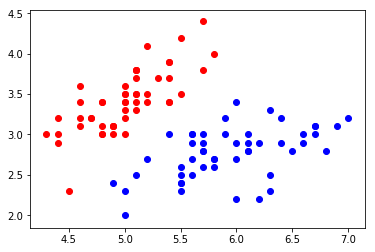

In [4]:
plt.scatter(X[y==0,0], X[y==0,1], color='r')
plt.scatter(X[y==1,0], X[y==1,1], color='b')
plt.show()

In [5]:
from playML.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, seed=666)

In [6]:
from playML.LogisticRegression import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LinearRegression

In [7]:
log_reg.score(X_test, y_test)

1.0

In [8]:
log_reg.coef_

array([ 3.01796521, -5.04447145])

In [9]:
log_reg.intercept_

-0.6937719272911228

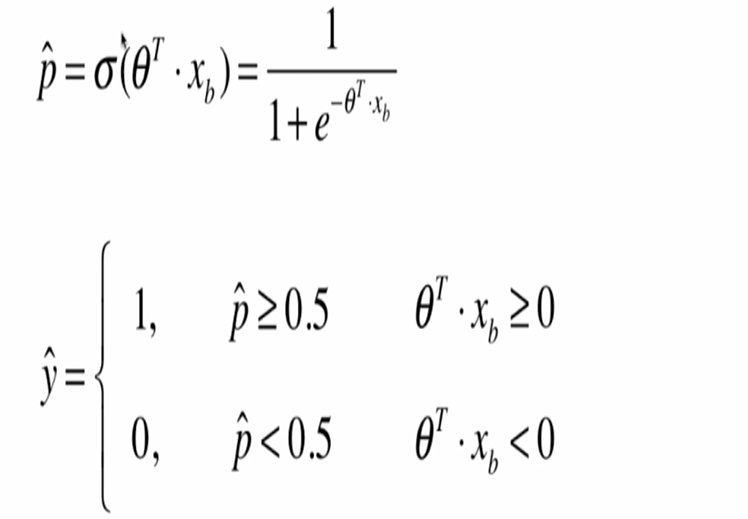

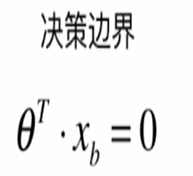

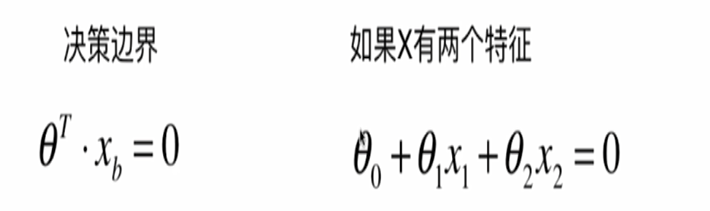

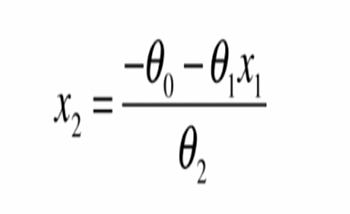

In [10]:
def x2(x1):
    return (-log_reg.coef_[0] * x1 -log_reg.intercept_) / log_reg.coef_[1]

In [11]:
x1_plot = np.linspace(4,8,1000)
x2_plot = x2(x1_plot)

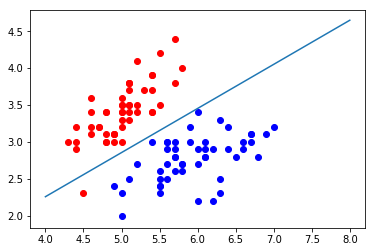

In [12]:
plt.scatter(X[y==0,0], X[y==0,1], color='r')
plt.scatter(X[y==1,0], X[y==1,1], color='b')
plt.plot(x1_plot, x2_plot)
plt.show()

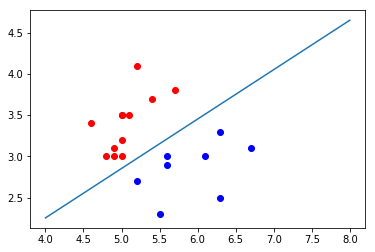

In [13]:
plt.scatter(X_test[y_test==0,0], X_test[y_test==0,1], color='r')
plt.scatter(X_test[y_test==1,0], X_test[y_test==1,1], color='b')
plt.plot(x1_plot, x2_plot)
plt.show()

## 绘制不规则决策边界

In [14]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)),
    )
    x_new=np.c_[x0.ravel(),x1.ravel()]
    
    y_predict=model.predict(x_new)
    zz=y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap=ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0,x1,zz,linewidth=5,cmap=custom_cmap)

E:\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


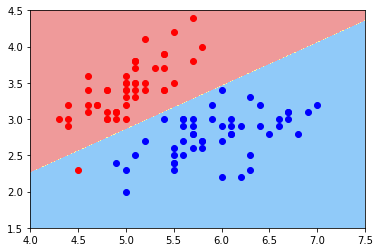

In [17]:
plot_decision_boundary(log_reg,axis=[4,7.5,1.5,4.5])
plt.scatter(X[y==0,0],X[y==0,1],color='r')
plt.scatter(X[y==1,0],X[y==1,1],color='b')
plt.show()

## knn的决策边界

In [19]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf=KNeighborsClassifier()
knn_clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [20]:
knn_clf.score(X_test,y_test)

1.0

E:\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


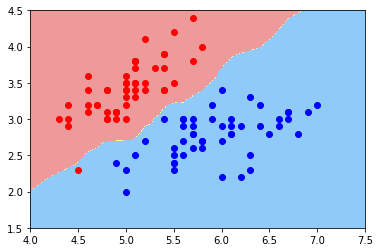

In [22]:
plot_decision_boundary(knn_clf,axis=[4,7.5,1.5,4.5])
plt.scatter(X[y==0,0],X[y==0,1],color='r')
plt.scatter(X[y==1,0],X[y==1,1],color='b')
plt.show()

In [23]:
knn_clf_all=KNeighborsClassifier()
knn_clf_all.fit(iris.data[:,:2],iris.target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

E:\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


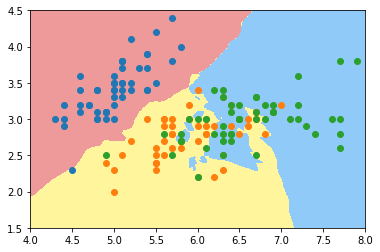

In [25]:
plot_decision_boundary(knn_clf_all,axis=[4,8,1.5,4.5])
plt.scatter(iris.data[iris.target==0,0],iris.data[iris.target==0,1])
plt.scatter(iris.data[iris.target==1,0],iris.data[iris.target==1,1])
plt.scatter(iris.data[iris.target==2,0],iris.data[iris.target==2,1])
plt.show()

In [26]:
knn_clf_all=KNeighborsClassifier(n_neighbors=50)
knn_clf_all.fit(iris.data[:,:2],iris.target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=50, p=2,
           weights='uniform')

E:\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


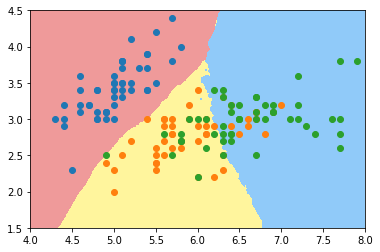

In [27]:
plot_decision_boundary(knn_clf_all,axis=[4,8,1.5,4.5])
plt.scatter(iris.data[iris.target==0,0],iris.data[iris.target==0,1])
plt.scatter(iris.data[iris.target==1,0],iris.data[iris.target==1,1])
plt.scatter(iris.data[iris.target==2,0],iris.data[iris.target==2,1])
plt.show()